##Importing libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split


##Downlaoding dataset from kaggle

###importing kaggle

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # This will allow you to upload your Kaggle API token JSON file.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"materwelon","key":"64ccf8bb1179a017a7549f1bae595c6a"}'}

In [ ]:
import os

# Make sure the Kaggle API token is in the correct location
os.makedirs("/root/.kaggle/", exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the Kaggle API token
os.chmod('/root/.kaggle/kaggle.json', 600)


In [ ]:
!kaggle datasets download -d zalando-research/fashionmnist


 97% 67.0M/68.8M [00:00<00:00, 197MB/s]
100% 68.8M/68.8M [00:00<00:00, 165MB/s]


###unzipping dataset

In [ ]:
!unzip -q fashionmnist.zip -d fashion_mnist_data


###Getting the train and test data

In [ ]:
# Load the training data
train_data = pd.read_csv("/content/fashion_mnist_data/fashion-mnist_train.csv")

# Load the testing data (if available)
test_data = pd.read_csv("/content/fashion_mnist_data/fashion-mnist_test.csv")


###First glance at data

In [ ]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Class distribution of Fashion-MNIST dataset

In [ ]:
class_distribution = pd.value_counts(y)

# Number of unique classes
num_classes = class_distribution.shape[0]

print("Number of classes:", num_classes)
print("Class distribution:")
print(class_distribution)


Number of classes: 10
Class distribution:
9    7000
0    7000
3    7000
2    7000
7    7000
5    7000
1    7000
6    7000
4    7000
8    7000
Name: class, dtype: int64


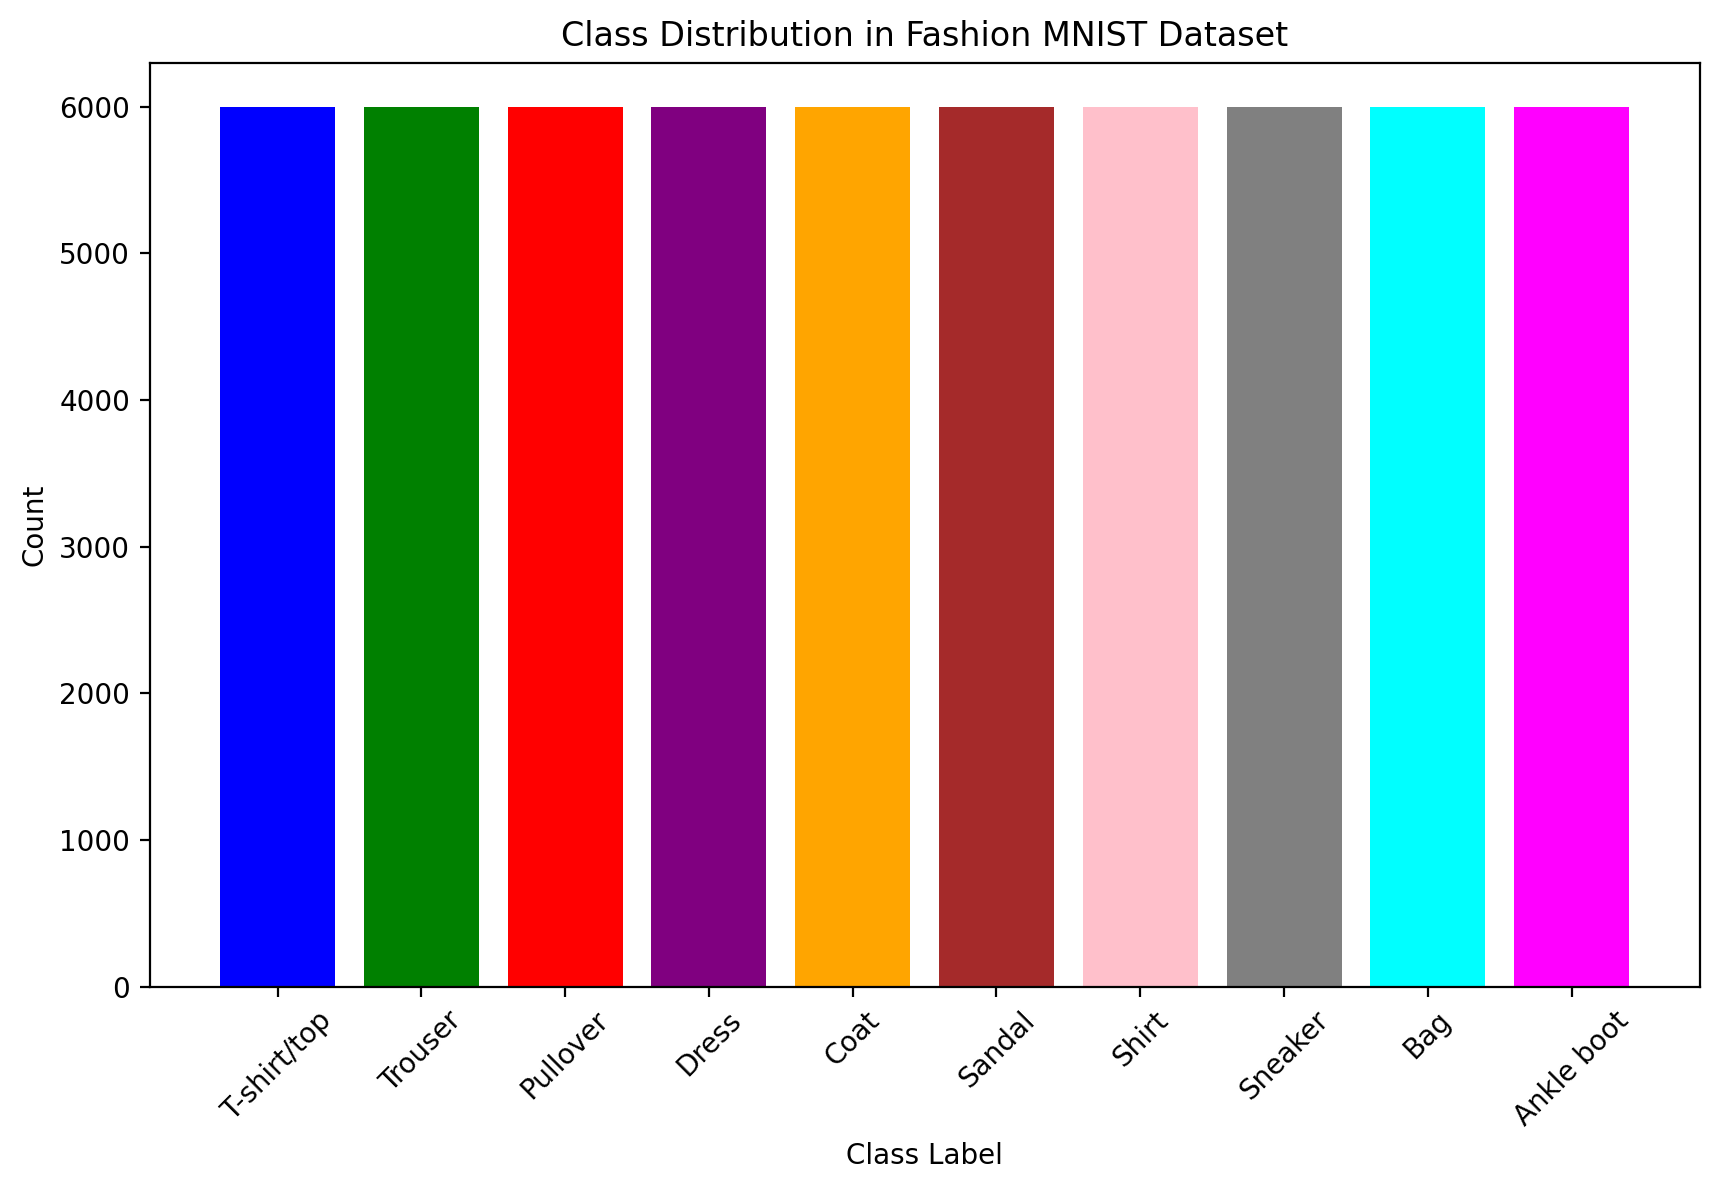

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the training data (you may have already loaded it)
# train_data = pd.read_csv("/content/fashion_mnist_data/train.csv")

# # Display the first few rows of the dataset to understand its structure
# print(train_data.head())

# Check the distribution of classes (labels) in the dataset
class_distribution = train_data['label'].value_counts().sort_index()

# Define colors for each class
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Visualize the distribution of classes with different colors
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values, color=colors)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution in Fashion MNIST Dataset')
plt.xticks(range(10), labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], rotation=45)
plt.show()


##GreyScale image

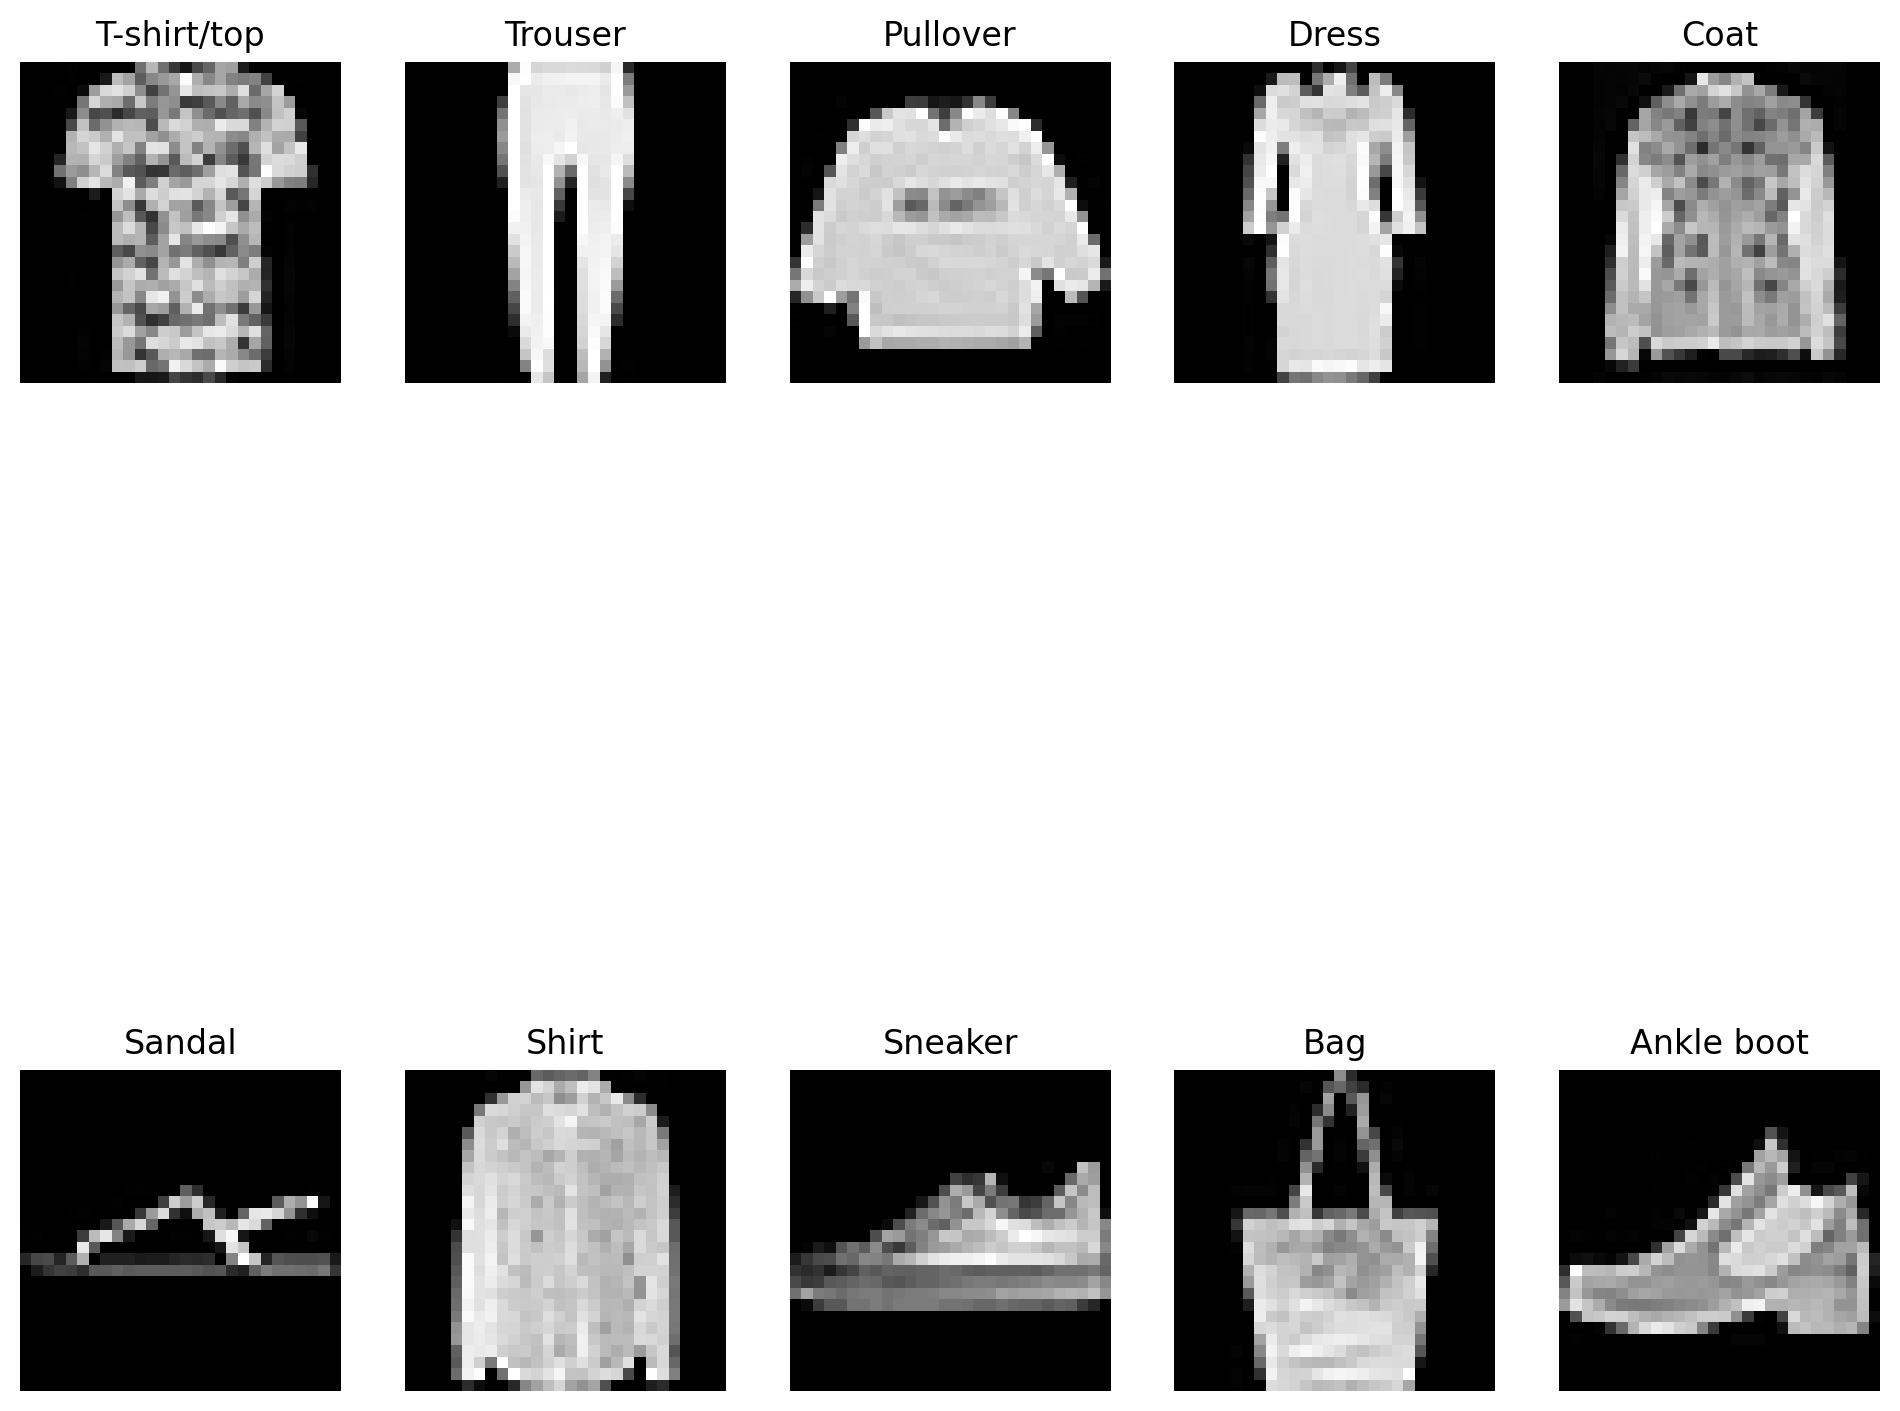

In [ ]:

class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure(figsize=(12, 12))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    class_data = train_data[train_data['label'] == i]
    sample_image = class_data.iloc[0, 1:]
    sample_image = np.array(sample_image).reshape(28, 28)
    plt.imshow(sample_image, cmap='gray')
    plt.title(class_labels[i])
    plt.axis('off')

plt.show()


In [ ]:
num_columns = train_data.shape[1]
print("Number of columns in the DataFrame:", num_columns)


Number of columns in the DataFrame: 785


##Downloading dataset using OpenML

In [ ]:
!pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 6.9 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.1-py3-none-any.whl size=146923 sha256=43822afd858f25ed997f682ee9b2200f8b003d78d33be2231a6351e06440ceca
  Stored in directory: /root/.cache/pip/wheels/75/bc/fd/739778254a2881ef96b139d0aaf60c6d4f9130bb1459b48f10
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=cd767ba9b31ce2d448d56cb1c3ee9001eb92691b9d558d3d2db24f8be994e151
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [ ]:
from openml.datasets import get_dataset

In [ ]:
fashion_mnist = get_dataset('Fashion-MNIST')

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [ ]:
X, y, _, _ = fashion_mnist.get_data(dataset_format="dataframe")

In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,1
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist_fashion = fetch_openml('Fashion-MNIST', cache=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


###The arguments from Sklearn

In [ ]:
mnist_fashion.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X = mnist_fashion['data']
y = mnist_fashion['target']

X.shape, y.shape


((70000, 784), (70000,))

###Class distribution for images

In [ ]:
classes = ['tshirt', 'trouser', 'pullover', 'dress','coat',
            'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

##Visulalizing the images

###Tuning default image parameter

In [ ]:
# plt.rcParams['figure.figsize'] = (5, 5)
# plt.rcParams['figure.dpi'] = 100

digits = y.unique()
digits = [int(x) for x in digits]
digits.sort()
digits

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

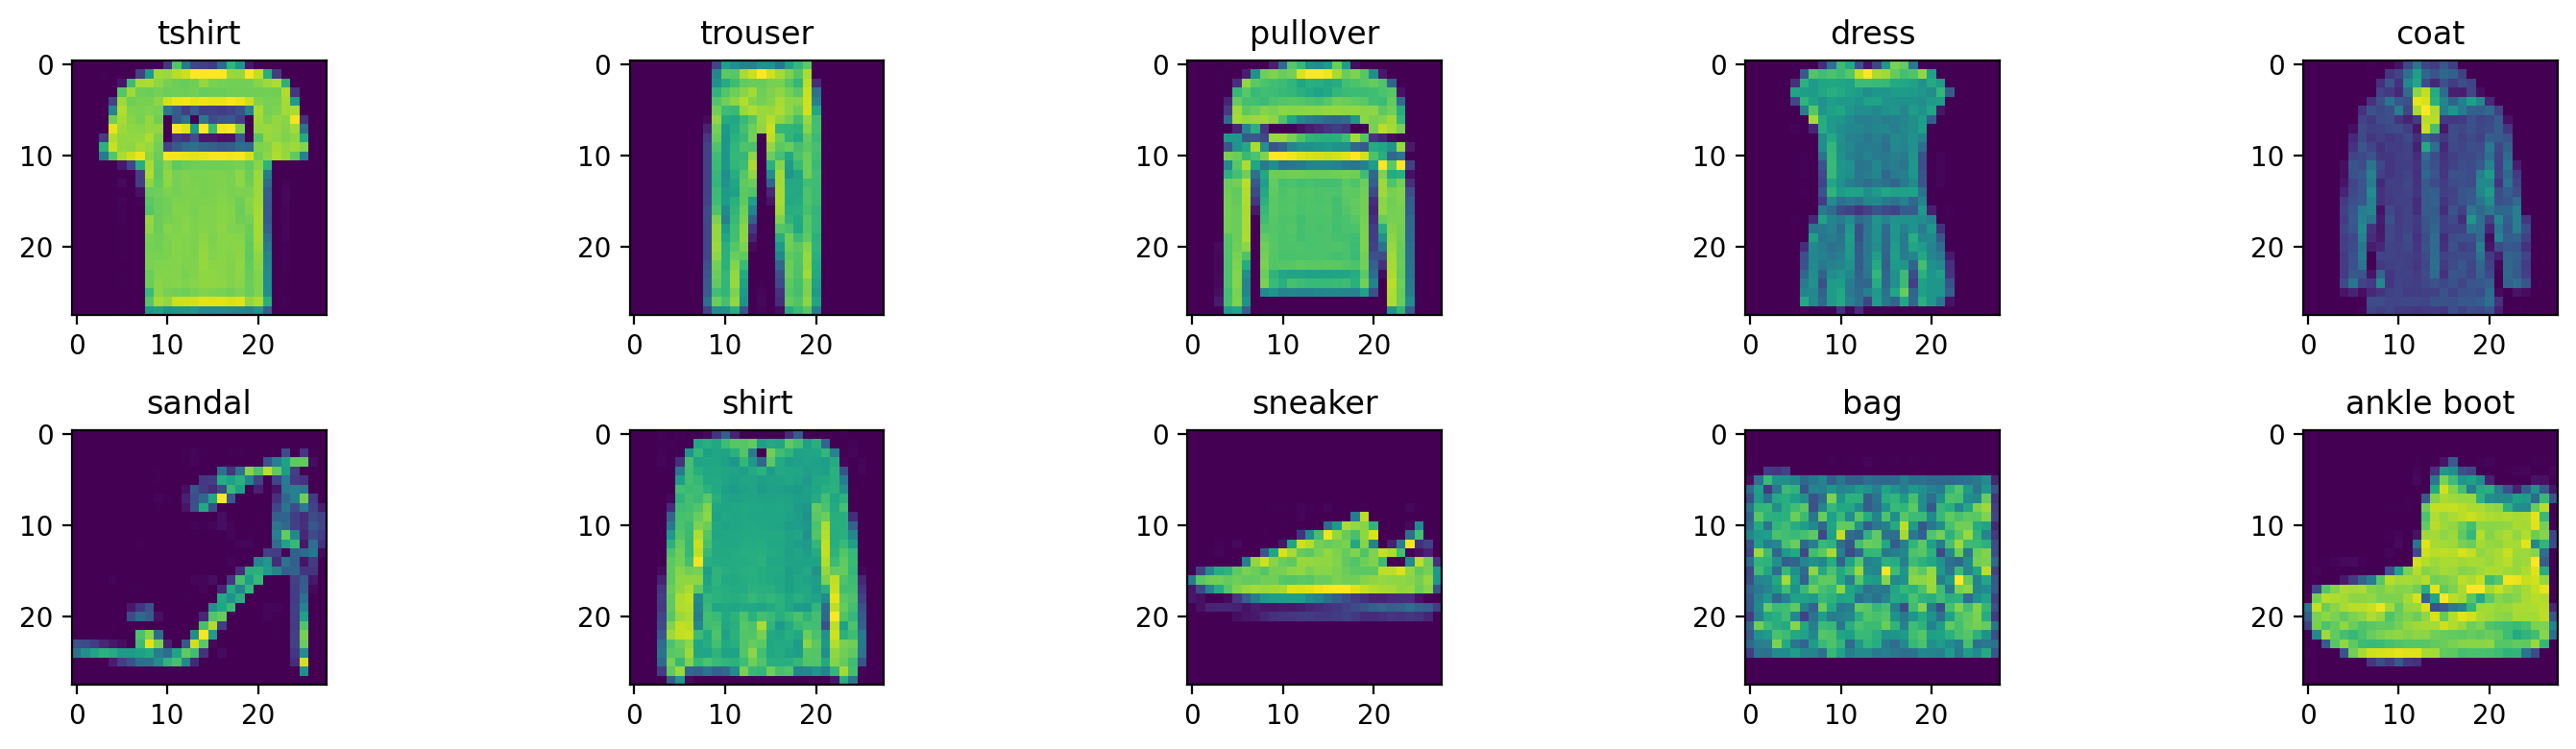

In [ ]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
    plt.subplot(2, 5, i+1)
    plt.imshow(X[y==str(i)].iloc[0].to_numpy().reshape(28, 28))
    plt.title(classes[i])

plt.tight_layout()

In [ ]:
X[y=='0'].iloc[0].to_numpy().reshape(28, 28)

##Splitting the data

In [ ]:
 from sklearn.model_selection import train_test_split

###Data will be distributed based on the label y.

###Need to convert the y data to int to feed the model

In [ ]:
y = y.astype('int')
y

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X/255, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((56000, 784), (14000, 784))

##Visualizing Data After Train-Test_Split

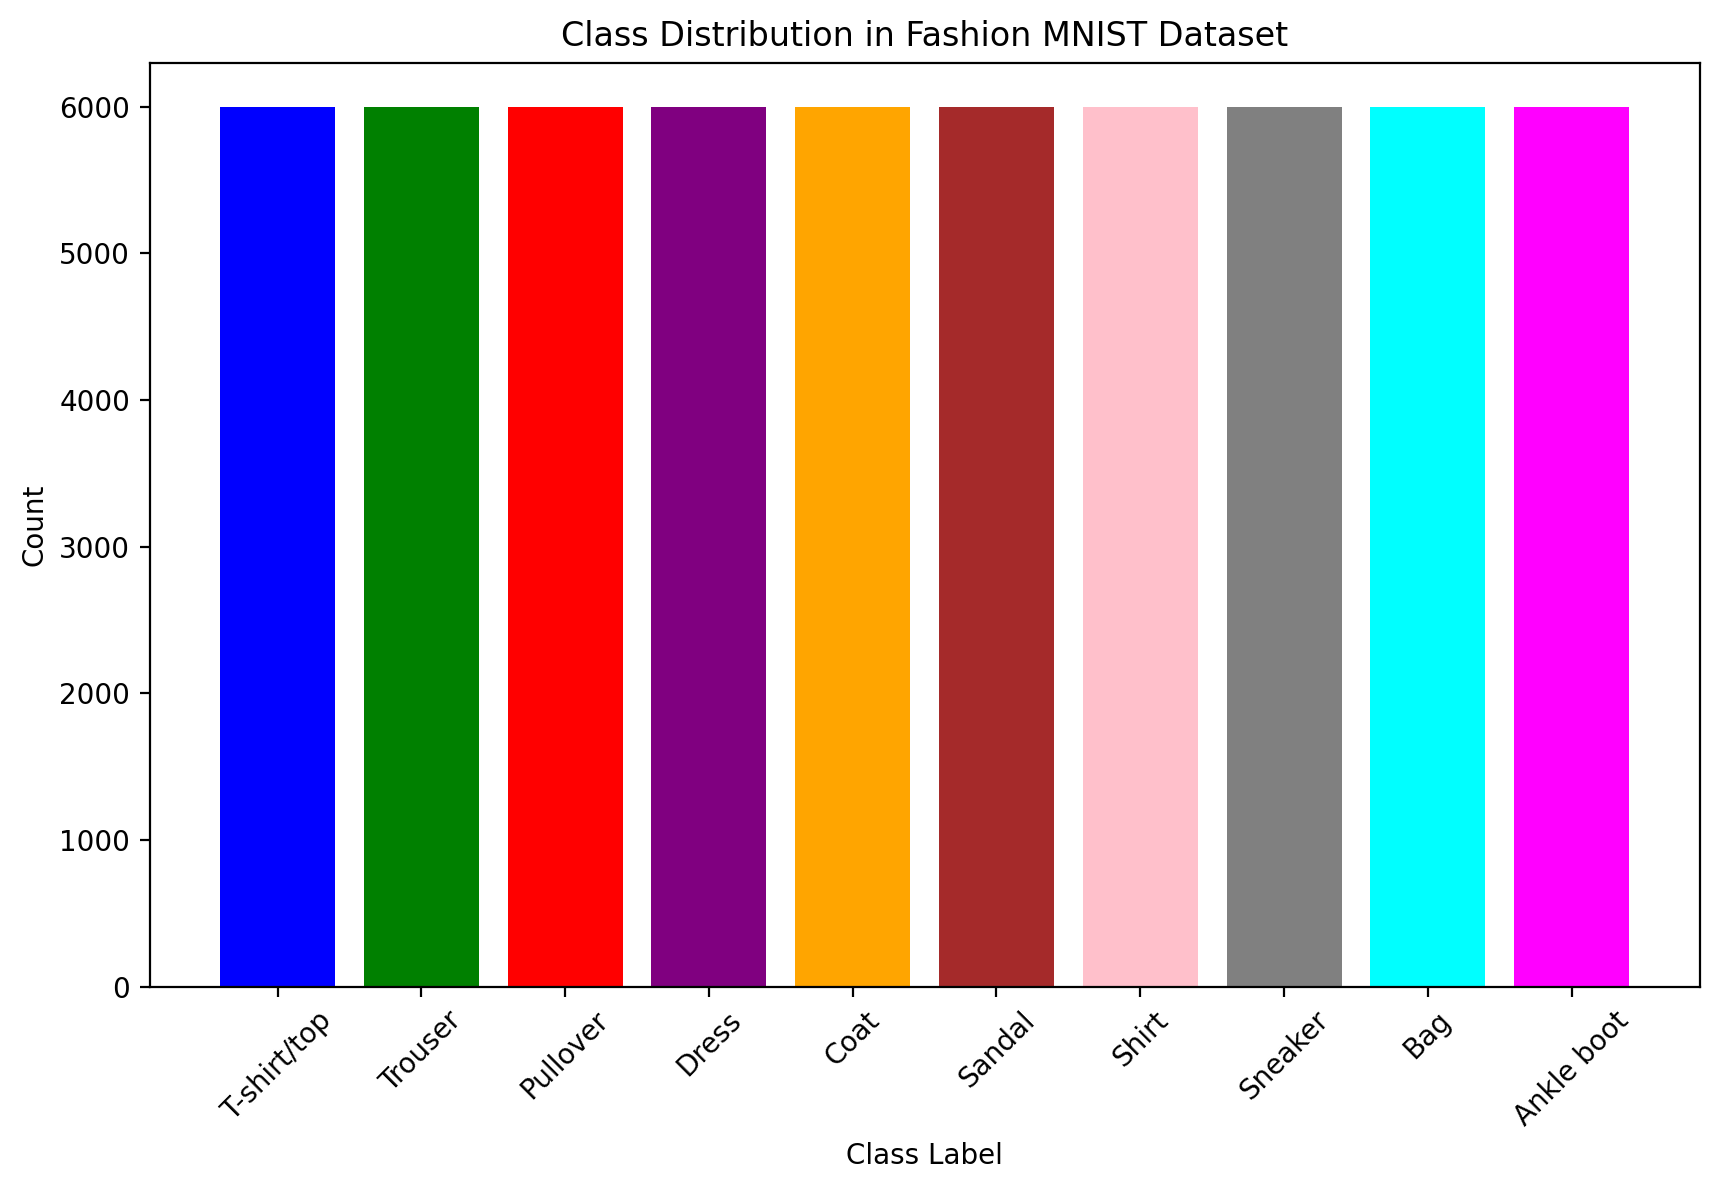

In [ ]:
# Check the distribution of classes (labels) in the dataset
class_distribution = train_data['label'].value_counts().sort_index()

# Define colors for each class
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Visualize the distribution of classes with different colors
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values, color=colors)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution in Fashion MNIST Dataset')
plt.xticks(range(10), labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], rotation=45)
plt.show()


###Importing the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

###Building model API

In [ ]:
def get_model():
    model = Sequential()
    model.add(Flatten(input_shape=(X.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [ ]:
model_sq = get_model()

###Analyzing the model

In [ ]:
model_sq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_sq.layers

In [ ]:
model_sq.layers[3].name

'dense_2'

In [ ]:
weight1 = model_sq.layers[1].get_weights()

In [ ]:
weight1[0].shape, weight1[1].shape

((784, 64), (64,))

In [ ]:
y_train

3095     5
46812    0
35560    6
35129    9
26077    7
        ..
48880    8
60051    4
50180    3
5276     7
34215    4
Name: class, Length: 56000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

##Trainning the Sequential model

###Accuracy obtained 0.89

In [ ]:
model_sq.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_sq.fit(X_train, y_train, epochs=10)
model_sq.evaluate(X_test, y_test)

Epoch 1/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2428 - accuracy: 0.9081
Epoch 2/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2353 - accuracy: 0.9114
Epoch 3/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2278 - accuracy: 0.9121
Epoch 4/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2245 - accuracy: 0.9151
Epoch 5/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2150 - accuracy: 0.9168
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2099 - accuracy: 0.9208
Epoch 7/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2048 - accuracy: 0.9218
Epoch 8/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1975 - accuracy: 0.9244
Epoch 9/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1947 - accuracy: 0.9252
Epoch 10/10
438/438 [==============================] - 1s 2ms/step - loss: 0.3395 

[0.3394751250743866, 0.8914285898208618]

##Evaluating Model

In [ ]:
X_test.shape

(14000, 784)

1/1 [==============================] - 0s 32ms/step


<ipython-input-76-f8feead1a865>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = X_test[y==i].iloc[0].to_numpy()


1/1 [==============================] - 0s 22ms/step


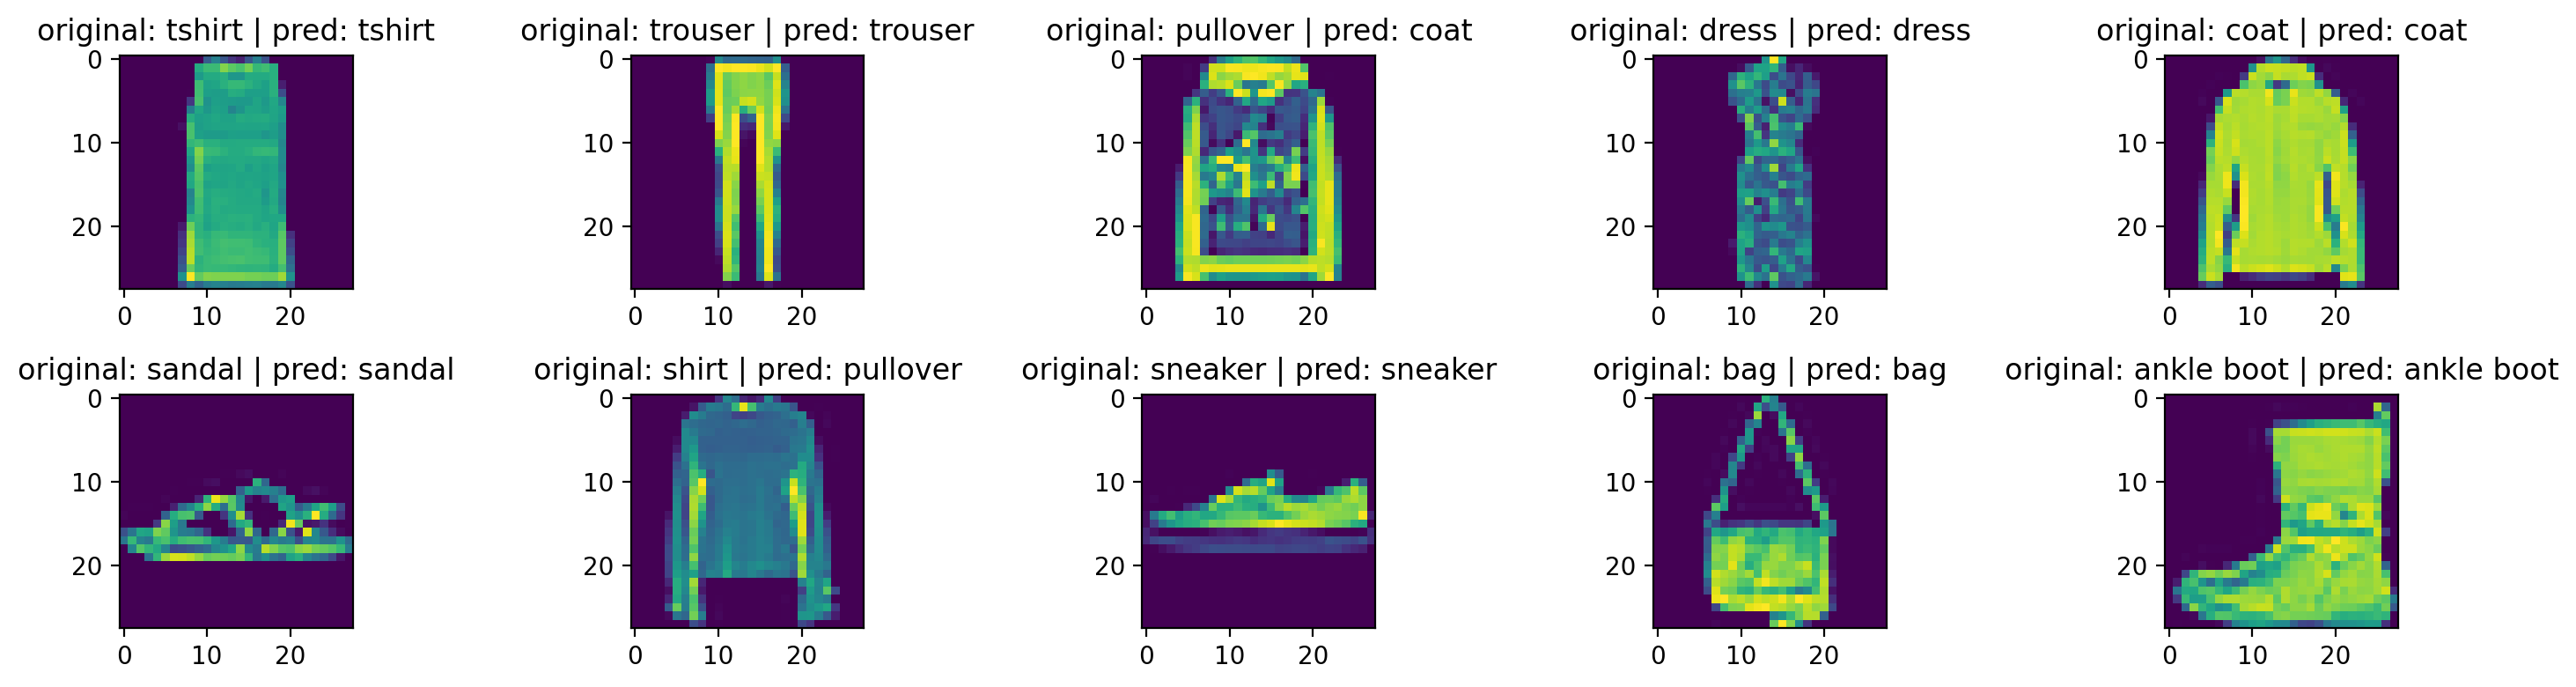

In [ ]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
    plt.subplot(2, 5, i+1)
    test = X_test[y==i].iloc[0].to_numpy()
    plt.imshow(test.reshape(28, 28))

    pred = model_sq.predict(test.reshape(1, 784,))
    idx = np.argmax(pred[0])
    pred_class = classes[idx]

    plt.title('original: {} | pred: {}'.format(classes[i], pred_class))

plt.tight_layout()

In [ ]:
pred = model_sq.predict(test.reshape(1, 784,))
idx = np.argmax(pred[0])
pred_class = classes[idx]
pred_class

1/1 [==============================] - 0s 91ms/step


'ankle boot'

In [ ]:
pred[0]

array([1.1283461e-14, 1.8624013e-22, 5.3386864e-20, 7.5621167e-12,
       3.8745524e-21, 3.4535631e-08, 5.6748713e-15, 1.3244910e-05,
       1.8954763e-17, 9.9998677e-01], dtype=float32)

##Saving my deep learning model

In [ ]:
model_sq.save('Fashion-MNIST_sq.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
import argparse
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

In [ ]:
model_path = '/content/Fashion-MNIST_sq.h5'
test_path = '/content/fashion_mnist_data/fashion-mnist_test.csv'
model = keras.models.load_model(model_path)

In [ ]:
model

In [ ]:
# def load_and_preprocess_test_data(test_folder):
df = pd.read_csv(test_path)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Testing the saved model

In [ ]:
df.shape

(10000, 785)

###Differentiating X and y values

In [ ]:
y = df.iloc[:,0]
X = df.iloc[:, 1: ]

X.shape

(10000, 784)

In [ ]:
y.dtype

dtype('int64')

###Single data test

In [ ]:
test = X.iloc[776].to_numpy()
pred = model.predict(test.reshape(1, 784,))
idx = np.argmax(pred[0])
pred_class = y[776]

idx, pred_class

1/1 [==============================] - 0s 188ms/step


(3, 3)

In [ ]:
from sklearn.metrics import accuracy_score

###Multiple data test

In [ ]:

# Initialize variables to keep track of correct predictions and total examples
correct_predictions = 0
total_examples = len(X)

# Iterate through all test examples
for i in range(total_examples):
    test_example = X.iloc[i].to_numpy()  # Get the feature values for the i-th test example
    test_example = test_example.reshape(1, 784)  # Reshape for prediction

    # Make a prediction
    pred = model_sq.predict(test_example)

    # Get the predicted class index
    predicted_class_index = np.argmax(pred[0])

    # Get the actual class label (ground truth)
    actual_class_label = y.iloc[i]

    # Check if the prediction matches the ground truth
    if predicted_class_index == actual_class_label:
        correct_predictions += 1

# Calculate the accuracy
accuracy = correct_predictions / total_examples
print("Accuracy:", accuracy)


1/1 [==============================] - 0s 25ms/step
Accuracy: 0.0174


In [ ]:
# import numpy as np

# Assuming you have your test data in a DataFrame called 'test_data'
# and you have already defined 'model' and 'y'

# Initialize variables to keep track of correct predictions and total examples
correct_predictions = 0
total_examples = len(X)
y_true = []
y_pred = []

# Iterate through all test examples
for i in range(total_examples):
    test_example = X.iloc[i].to_numpy()  # Get the feature values for the i-th test example
    test_example = test_example.reshape(1, 784)  # Reshape for prediction

    # Make a prediction
    pred = model_sq.predict(test_example)

    # Get the predicted class index
    predicted_class_index = np.argmax(pred[0])

    # Get the actual class label (ground truth)
    actual_class_label = y.iloc[i]
    y_true.append(y.iloc[i])
    y_pred.append(predicted_class_index)



# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

1/1 [==============================] - 0s 22ms/step
Accuracy: 0.88


In [ ]:
X[0]

0

In [ ]:
X.shape[0]

10000

In [ ]:
model_summary = model.summary()
print(model_summary)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


##The script to test

In [ ]:
!python evaluate_model.py --model_path '/content/evaluate_model.py' --test_file '/content/fashion_mnist_data/fashion-mnist_test.csv'


2023-11-01 20:28:37.766818: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 20:28:37.766911: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 20:28:37.766949: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 20:28:39.202834: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 [==============================] - 0s 20ms/step
Model evaluation completed. Results written to output.txt.


##Human-in-the-loop

###Confidence thresholding is a technique for determining the level of certainty or confidence in a machine learning model's predictions.

When the model predicts a class label, it also estimates a confidence score or probability associated with that prediction. The confidence score expresses how certain the model is of its prediction.

We define a specific threshold value (e.g., a probability value between 0 and 1) in confidence thresholding. This is the minimum level of confidence that a prediction must have in order to be considered valid and accepted.

Predictions with confidence scores greater than the threshold are automatically accepted as valid by the system. These are considered to be high-confidence forecasts.

Predictions with confidence levels lower than the threshold are marked as uncertain. These are regarded as low-confidence forecasts. Uncertain predictions can be handled in a variety of ways:

They can be sent for human review to obtain expert feedback.
They can instruct the model to request additional data or information in order to boost confidence.

They can be used to initiate a more cautious or backup decision-making strategy.

###Just in case you did not find the evaluate_model.py, I have included it here

In [ ]:
import os
import sys
import argparse
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

model_path = '/content/Fashion-MNIST_sq.h5'
test_path = '/content/fashion_mnist_data/fashion-mnist_test.csv'
model = keras.models.load_model(model_path)

def load_and_preprocess_test_data(test_folder):
    df = pd.read_csv(test_folder)
    y = df.iloc[:,0]
    X = df.iloc[:, 1: ]

    return X, y

def evaluate_model(model_path, test_path):
    correct_predictions = 0
    X, y = load_and_preprocess_test_data(test_path)
    total_examples = len(X)
    y_true = []
    y_pred = []

    # Iterate through all test examples
    for i in range(total_examples):
        test_example = X.iloc[i].to_numpy()  # Get the feature values for the i-th test example
        test_example = test_example.reshape(1, 784)  # Reshape for prediction

        # Make a prediction
        pred = model.predict(test_example)

        # Get the predicted class index
        predicted_class_index = np.argmax(pred[0])

        # Get the actual class label (ground truth)
        actual_class_label = y.iloc[i]
        y_pred.append(predicted_class_index)
        y_true.append(actual_class_label)



    # Calculate the accuracy
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy



def main():
    # Parse command-line arguments
    parser = argparse.ArgumentParser(description="Model Evaluation")
    parser.add_argument('--model_path', type=str, required=True, help="Path to the trained model")
    parser.add_argument('--test_file', type=str, required=True, help="Path to the file containing test data")
    args = parser.parse_args()

    model_path = args.model_path
    test_folder = args.test_file

    try:
        accuracy = evaluate_model(model_path, test_folder)
        # model_summary = model.summary()
        # model_summary = str(model_summary)
        accuracy = str(accuracy)

        # Create and write to the output.txt file
        with open('output.txt', 'w') as output_file:
            output_file.write("Model Architecture:\n")
            model_summary = model.summary(print_fn=lambda x: output_file.write(x + '\n'))
            output_file.write(f"Test Accuracy: {accuracy}\n")
            output_file.write("\nAdditional Insights and observations:\n")
            output_file.write("\n1. The dataset's remarkable class balance with approximately 6,000 samples\nper class minimizes the risk of underfitting or overfitting,\nensuring a robust foundation for model training.\n")
            output_file.write("\n2. Reshaping the 784-pixel images was a crucial preprocessing step,\nenhancing data compatibility and model training efficiency.\n")
            output_file.write("\n3. Recognizing visually similar classes like pullovers, coats, and shirts\ncan be challenging. In these cases, leveraging human expertise in a human-in-the-loop approach\ncan improve model accuracy.\n")
            output_file.write("\n4. Future work can focus on refining the model, integrating more features,\nand further engaging human expertise to advance sustainable apparel classification.\n")
        print("Model evaluation completed. Results written to output.txt.")
    except FileNotFoundError:
        print("Error: The provided folder doesn't exist or is empty.")
        sys.exit(1)
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        sys.exit(1)

if __name__ == '__main__':
    main()
    sys.exit(0)



